In [35]:
import numpy as np
import pandas as pd
import seaborn as sb

C:\Users\acemec\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\acemec\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\acemec\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\acemec\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [38]:
#closed network with two queues and constant propagation delay
from tqdm import tqdm


T = 0
N = 100000
n_customer = 100
np.random.seed(1)
prop_delay1 = np.random.exponential(1/10, N)
prop_delay2 = np.random.exponential(1/10, N)
miu1 = 1/10
miu2 = 1/10

_ = np.random.exponential(miu1, N)
ins1 = [sum(_[:i+1]) for i in range(n_customer)]
ins2 = []
delay1 = []
delay2 = []
scheduler = [[s, 1] for s in ins1]

rw, W = pd.DataFrame(columns = ['place', 'arr', 'ser', 'lea']), n_customer
rl1, L1 = pd.DataFrame(columns=['n_sys', 't_sys']), 0
rld1, Ld1 = pd.DataFrame(columns=['n_sys', 't_sys']), 0
rl2, L2 = pd.DataFrame(columns=['n_sys', 't_sys']), 0
rld2, Ld2 = pd.DataFrame(columns=['n_sys', 't_sys']), 0

for i in range(n_customer):
    rw.loc[i] = [1, 0, sum(_[:i]), sum(_[:i])+_[i]]

for n in tqdm(range(N)):

    T, obj = scheduler[0]

    if obj == 1:
        rl1.loc[L1], L1 = [len(ins1), T], L1+1
        rld1.loc[Ld1], Ld1 = [len(delay1), T], Ld1+1
        rw.loc[W], W = [-1, T, T, T+prop_delay1[n]], W+1
        delay1.append(T+prop_delay1[n])
        scheduler.append([T+prop_delay1[n], -1])
        ins1.pop(0)
    elif obj == 2:
        rl2.loc[L2], L2 = [len(ins2), T], L2+1
        rld2.loc[Ld2], Ld2 = [len(delay2), T], Ld2+1
        rw.loc[W], W = [-2, T, T, T+prop_delay2[n]], W+1
        delay2.append(T+prop_delay2[n])
        scheduler.append([T+prop_delay2[n], -2])
        ins2.pop(0)
    elif obj == -1:
        rld1.loc[Ld1], Ld1 = [len(delay1), T], Ld1+1
        rl2.loc[L2], L2 = [len(ins2), T], L2+1
        if ins2: rw.loc[W], W = [2, T, ins2[-1], ins2[-1]+np.random.exponential(miu2)], W+1
        else: rw.loc[W], W = [2, T, T, T+np.random.exponential(miu2)], W+1
        ins2.append(rw.iloc[W-1][3])
        scheduler.append([rw.iloc[W-1][3], 2])
        delay1.pop(0)
    else:
        rld2.loc[Ld2], Ld2 = [len(delay2), T], Ld2+1
        rl1.loc[L1], L1 = [len(ins1), T], L1+1
        if ins1: rw.loc[W], W = [1, T, ins1[-1], ins1[-1]+np.random.exponential(miu1)], W+1
        else: rw.loc[W], W = [1, T, T, T+np.random.exponential(miu1)], W+1
        ins1.append(rw.iloc[W-1][3])
        scheduler.append([rw.iloc[W-1][3], 1])
        delay2.pop(0)
    scheduler.pop(0)
    scheduler.sort()
#print(rw)



100%|██████████████████████████████████| 100000/100000 [22:22<00:00, 74.46it/s]


In [53]:
rw.to_csv('exp10delayRW.csv')
rl1.to_csv('exp10delayRL1.csv')
rld1.to_csv('exp10delayRLD1.csv')
rl2.to_csv('exp10delayRL2.csv')
rld2.to_csv('exp10delayRLD2.csv')

In [44]:
np.average(rw.loc[rw.place == -1.0].arr.diff()[1:])

0.10115528396233484

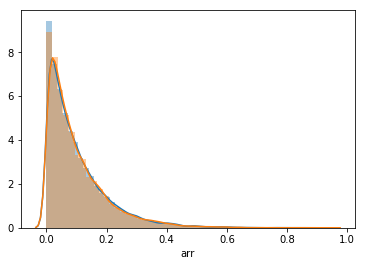

In [45]:
sb.distplot(rw.loc[rw.place == 1.0].arr.diff()[1:])
sb.distplot(np.random.exponential(0.1, 20000))

In [49]:
rl1['seg'] = rl1.t_sys.diff()
rl1.head()
sum(rl1[rl1.n_sys == 0.0].seg[2:])/rw.lea.max()

0.006980366950328359

In [12]:
sum(rl1.t_sys.diff()[1:])/rl1.t_sys.max()

0.730968380571279

In [51]:
rl2['d'] = rl2.t_sys.diff()
sum(rl1[rl1.n_sys == 0.0].d[1:])/rl2.t_sys.max()

AttributeError: 'DataFrame' object has no attribute 'd'

In [52]:
np.average(rw[rw.place==1.0].arr.diff()[1:])

0.10115744205942857

In [21]:
rl2.t_sys.max()

6288.5384486276835